In [ ]:
#!!pip install pybind11>=2.12
!!pip install --upgrade module_name

In [2]:
import pandas as pd
df=pd.read_csv('salaries.csv')
df

['Requirement already satisfied: module_name in c:\\users\\hp\\anaconda3\\lib\\site-packages (0.6.0)']

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [4]:
df_cleaned=df.dropna(inplace=True)
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [6]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Séparer les caractéristiques (X) de la cible (y)
X = df.drop(columns=['salary_more_then_100k'])
y = df['salary_more_then_100k']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% d'entraînement et 20% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les colonnes catégorielles
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Créer un pipeline pour prétraiter les données et entraîner le modèle
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude:", accuracy)


Exactitude: 0.25


In [7]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) de la cible (y)
X = df.drop(columns=['salary_more_then_100k'])
y = df['salary_more_then_100k']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% d'entraînement et 20% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Appliquer l'encodage one-hot aux données d'entraînement et de test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Instancier le modèle d'arbre de décision
tree_model = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement encodées
tree_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [9]:
print(X_train_encoded.dtypes)
print(X_test_encoded.dtypes)

company_abc pharma         bool
company_facebook           bool
company_google             bool
job_business manager       bool
job_computer programmer    bool
job_sales executive        bool
degree_bachelors           bool
degree_masters             bool
dtype: object
company_facebook           bool
company_google             bool
job_computer programmer    bool
job_sales executive        bool
degree_bachelors           bool
degree_masters             bool
dtype: object


In [10]:
print(X_train_encoded.index)
print(X_test_encoded.index)

Index([13, 11, 8, 9, 2, 15, 4, 7, 10, 12, 3, 6], dtype='int64')
Index([0, 1, 5, 14], dtype='int64')


In [11]:
print("Training columns:", X_train_encoded.columns)
print("Test columns:", X_test_encoded.columns)

Training columns: Index(['company_abc pharma', 'company_facebook', 'company_google',
       'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')
Test columns: Index(['company_facebook', 'company_google', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')


In [12]:
# Ensure test set has the same columns as the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [13]:
X_train_encoded.columns = X_train_encoded.columns.str.strip()
X_test_encoded.columns = X_test_encoded.columns.str.strip()

In [14]:
# Aligner les colonnes des ensembles de données d'entraînement et de test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

# Vérifier que les noms de colonnes sont les mêmes
print("Colonnes d'entraînement :", X_train_encoded.columns)
print("Colonnes de test :", X_test_encoded.columns)

# Assurez-vous que les colonnes de test ont le même ordre que celles de l'entraînement
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Faire des prédictions sur l'ensemble de test
y_pred = tree_model.predict(X_test_encoded)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Colonnes d'entraînement : Index(['company_abc pharma', 'company_facebook', 'company_google',
       'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')
Colonnes de test : Index(['company_abc pharma', 'company_facebook', 'company_google',
       'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')
Accuracy: 0.25


In [21]:
!pip install --upgrade graphviz

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [26]:
import os
import graphviz

# Set the path to the Graphviz executable
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'  # Adjust this path as necessary


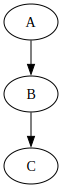

In [27]:
import graphviz

dot_data = """
digraph G {
    A -> B;
    B -> C;
}
"""
graph = graphviz.Source(dot_data)
graph


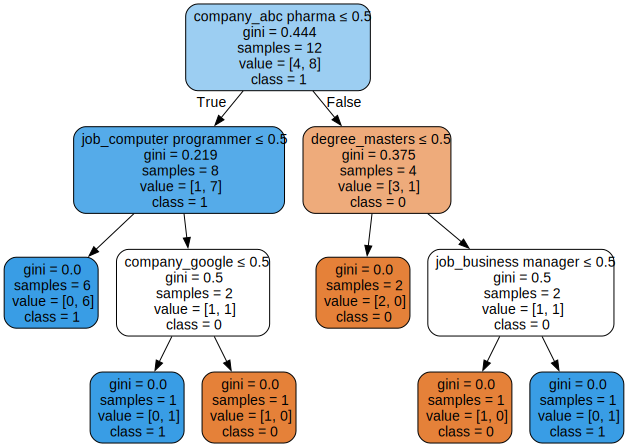

In [28]:
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import graphviz
from sklearn.tree import DecisionTreeClassifier

# Define categorical features
categorical_features = ['company', 'job', 'degree']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Define pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Extract feature names after one-hot encoding
onehot_columns = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(categorical_features)

# Combine with other feature names if needed
feature_names = onehot_columns

# Convert class names to strings
class_names = [str(cls) for cls in pipeline.named_steps['classifier'].classes_]

# Export decision tree to DOT format
dot_data = export_graphviz(pipeline.named_steps['classifier'], out_file=None, 
                           feature_names=feature_names,  
                           class_names=class_names,  
                           filled=True, rounded=True,  
                           special_characters=True)

# Display decision tree
graph = graphviz.Source(dot_data)
graph


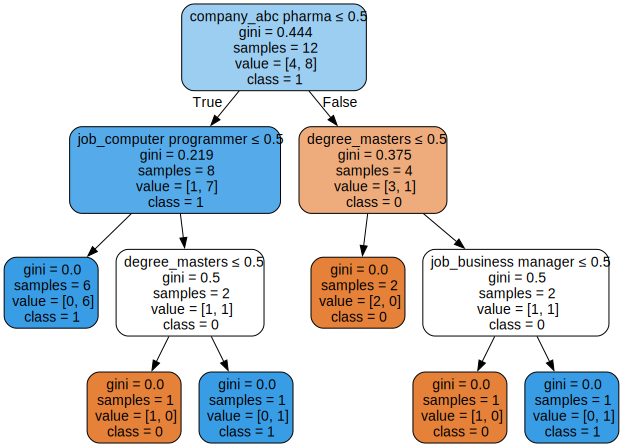

In [29]:
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import graphviz
from sklearn.tree import DecisionTreeClassifier

# Définir les caractéristiques catégorielles
categorical_features = ['company', 'job', 'degree']

# Définir les étapes de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Les autres colonnes sont laissées telles quelles
)

# Définir le pipeline avec le prétraitement et le classifieur d'arbres de décision
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Ajuster le pipeline sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Extraire les noms des caractéristiques après l'encodage one-hot
onehot_columns = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(categorical_features)

# Si vous avez des colonnes numériques ou d'autres colonnes non encodées, les ajouter ici
# Dans cet exemple, on suppose qu'il n'y a pas de colonnes non catégorielles à ajouter.
feature_names = onehot_columns

# Convertir les classes en chaînes de caractères pour éviter l'erreur de concaténation
class_names = [str(cls) for cls in pipeline.named_steps['classifier'].classes_]

# Exporter l'arbre de décision vers un fichier dot
dot_data = export_graphviz(pipeline.named_steps['classifier'], out_file=None, 
                           feature_names=feature_names,  
                           class_names=class_names,  # Utilisation des noms de classes convertis en chaînes
                           filled=True, rounded=True,  
                           special_characters=True)

# Afficher l'arbre de décision
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Sauvegarder le graphique dans un fichier
graph
